# Gradientenabstieg auf einer Fehleroberfläche

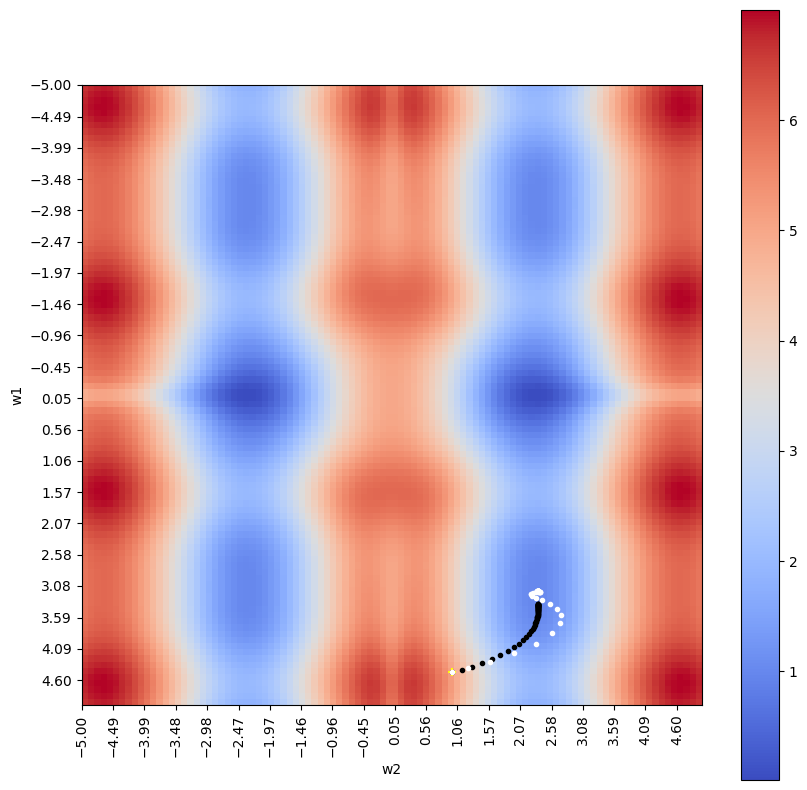

In [8]:
from numpy import *
import sympy

#f = np.sin(w1)**4 + 5*np.cos(w2/1.5)**2 + np.tanh(w1*w2)**2
w1, w2 = sympy.symbols("w1 w2")
f1 = sympy.Pow( sympy.sin(w1), 4 )
f2 = 5 * sympy.Pow(sympy.cos(w2/1.5), 2)
f3 = sympy.Pow( sympy.tanh(w1*w2), 2 )
loss = f1 + f2 + f3

dloss_dw1 = sympy.diff(loss, w1)
dloss_dw2 = sympy.diff(loss, w2)
#print( f"dloss_dw1={dloss_dw1}" )
#print( f"dloss_dw2={dloss_dw2}" )

def compute_loss(w1,w2):
    #f = np.sin(w1)**4 + 5*np.cos(w2/1.5)**2 + np.tanh(w1*w2)**2
    return sin(w1)**4 + 5*cos(w2/1.5)**2 + tanh(w1*w2)**2

def compute_gradient(w1,w2):
    deriv1 = 2*w2*(1 - tanh(w1*w2)**2)*tanh(w1*w2) + 4*sin(w1)**3*cos(w1)
    deriv2 = 2*w1*(1 - tanh(w1*w2)**2)*tanh(w1*w2) - 6.666*sin(0.666*w2)*cos(0.666*w2 )
    gradient = [ deriv1, deriv2 ]
    return array(gradient)
    
alle_zeilen = []
sections = 100
r = 5
w1_values = linspace(-r,+r,sections)
w2_values = linspace(-r,+r,sections)
w1_ticks = [round(w1,2) for i,w1 in enumerate(w1_values) if i % 5 == 0]
w2_ticks = [round(w2,2) for i,w2 in enumerate(w2_values) if i % 5 == 0]
for w1 in w1_values:
    eine_zeile = []    
    for w2 in w2_values:
        f = compute_loss(w1,w2)        
        eine_zeile.append( f )        
    alle_zeilen.append( eine_zeile )    
ErrorSurface = array( alle_zeilen )


def gradient_descent(start_w1, start_w2, steps, alpha, beta=0.0):
    
    points_w1 = []
    points_w2 = []
    
    w1 = start_w1
    w2 = start_w2
    
    velocity_vec = array([0.0, 0.0])
    
    for step_nr in range(steps):
        g = compute_gradient(w1,w2)
        #print( f"g={g}, ||g||={linalg.norm(g)}" )
        
        velocity_vec = beta * velocity_vec + alpha * g
        
        w1 = w1 - velocity_vec[0]
        w2 = w2 - velocity_vec[1]
        points_w1.append(w1)
        points_w2.append(w2)
        
    return points_w1, points_w2

    
start_w1 = random.uniform(-r,+r)
start_w2 = random.uniform(-r,+r)
nr_steps = 60
alpha = 0.05
points_w1, points_w2 = gradient_descent(start_w1,
                                        start_w2,
                                        nr_steps,
                                        alpha)

pointsM_w1, pointsM_w2 = gradient_descent(start_w1,
                                          start_w2,
                                          nr_steps,
                                          alpha,
                                          beta=0.7)

import matplotlib.pyplot as plt
plt.figure( figsize=(10,10) )
plt.imshow( ErrorSurface, cmap="coolwarm", extent=[-r,+r,+r,-r] )
plt.colorbar()

plt.scatter(points_w2, points_w1, marker=".", color="black")
plt.scatter(points_w2[0], points_w1[0], marker="+", color="yellow")

plt.scatter(pointsM_w2, pointsM_w1, marker=".", color="white")

plt.xlabel("w2")
plt.ylabel("w1")
plt.xticks( w2_ticks, rotation=90 )
plt.yticks( w1_ticks )
plt.show()